In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/prichter/Documents/selenobot/src/')

# Detection task

"Detection task" refers to the ability of the classifier to identify a sequence as either an erroneously-truncated selenoprotein, or a full-length non-selenoprotein. For this task, we used full-length negative normal proteins as negative test cases. The negative cases did *not* include full-length selenoproteins; we are basing this project on the observation that selenoproteins are misidentified, so full-length selenoproteins will not be present in the data we use to validate the model. The positive cases consisted of selenoproteins truncated at the *first* selenocysteine residue only. 

In [3]:
# Define the data and figure directories. 
DATA_DIR = '/home/prichter/Documents/selenobot/data/uniprot_2023_03/detect' 
FIGURE_DIR = '/home/prichter/Documents/selenobot/figures/'

In [4]:
from src.classifiers import EmbeddingClassifier, AacClassifier, optimize_hyperparameters
from src.dataset import get_dataloader
from src.utils import csv_ids, csv_labels
import src.plot as plot

import os
import matplotlib.pyplot as plt
import seaborn as sns

/home/prichter/Documents/selenobot/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Paths where the train and test data are stored. 
train_path = os.path.join(DATA_DIR, 'train.csv')
test_path = os.path.join(DATA_DIR, 'test.csv')
val_path = os.path.join(DATA_DIR, 'val.csv')

# First load the data into a dataset object. 
train_dataloader = get_dataloader(train_path, batch_size=2048)
val_dataloader = get_dataloader(val_path, batch_size=2048)
# test_dataloader = get_dataloader(test_path, batch_size=1024)

## Testing the benchmark

In [6]:
# First, try training with no other weight, to get a sense of how many epochs to use.
model = EmbeddingClassifier(latent_dim=1024) 
# model = EmbeddingClassifier(1024)

In [7]:
# aac_reporters = []
# for bce_loss_weight in [1, 10, 100, 1000, 10000, 100000]:
#     model.reset() # Reset the model weights. 
#     aac_reporter = model._train(train_dataloader, val=test_dataloader, epochs=1, lr=0.001, bce_loss_weight=bce_loss_weight)
#     aac_reporters.append(aac_reporter)
#     break
reporter = model.fit(train_dataloader, val=val_dataloader, epochs=15, lr=0.001, bce_loss_weight=1) 

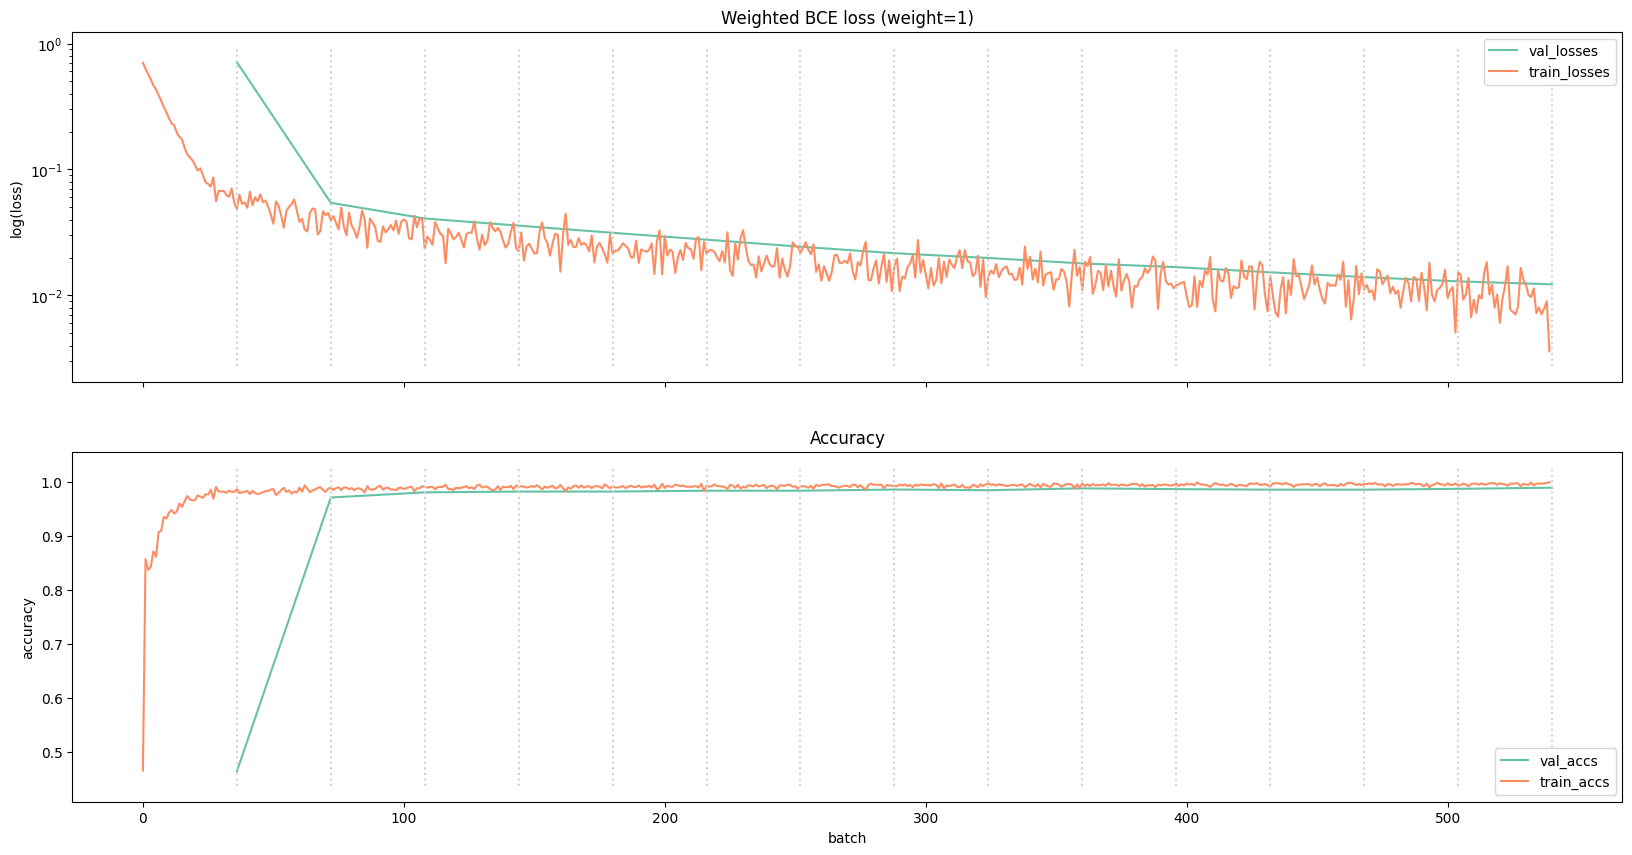

In [9]:
plot.plot_model_training(reporter, path=None)

In [10]:
best = optimize_hyperparameters(train_dataloader, val_dataloader, model=EmbeddingClassifier())

classifiers.optimize_hyperparameters: Recorded a test loss of 0.44 with bce_loss_weight=596.


classifiers.optimize_hyperparameters: Recorded a test loss of 1.02 with bce_loss_weight=1436.


classifiers.optimize_hyperparameters: Recorded a test loss of 6.46 with bce_loss_weight=8156.


classifiers.optimize_hyperparameters: Recorded a test loss of 7.87 with bce_loss_weight=3864.


classifiers.optimize_hyperparameters: Recorded a test loss of 19.99 with bce_loss_weight=6653.


classifiers.Classifier.train_:  20%|██        | 1/5 [00:03<00:15,  3.82s/it]

In [ ]:
result.x

[1.0]